# Text Magician Process

---

## 1. Set API Keys

In [1]:
import os

from config.secret_keys import OPENAI_API_KEY

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

## 2. Import Modules

In [3]:
# text magician
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# define graph state
from typing import List
from typing_extensions import TypedDict

# construct graph
from langgraph.graph import START, END, StateGraph

## 3. Define Agents

In [4]:
llm = ChatOpenAI(
    model = "gpt-4o-mini",
    temperature=0.5,
)

text_magician = llm | StrOutputParser()

## 4. Construct Application

### 4-1. Define Graph State

In [14]:
class State(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
    """

    question : str
    generation : str

### 4-2. Define Nodes

In [15]:
def text_magician_node(state):
    """
    Summary / Expand the given text.

    Args : 
        state (dict) : The current graph state

    Returns :
        state (dict) : New key added to state, generation, that contains LLM generation
    """

    print("[Graph Log] TEXT_MAGICIAN ...")

    question = state["question"]

    generation = text_magician.invoke(question)

    return {
        "question" : question,
        "generation" : generation
    }

### 4-3. Construct Graph

In [16]:
workflow = StateGraph(State)

# Add Nodes
workflow.add_node("text_magician", text_magician_node)

# Add Edges
workflow.add_edge(START, "text_magician")
workflow.add_edge("text_magician", END)

app = workflow.compile()

### 4-4. Visualize Graph

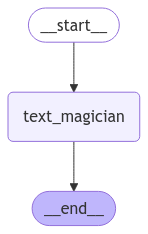

In [17]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## 5. Test

In [18]:
inputs = {"question" : """
    최근 코스피는 외국인과 기관투자자의 매수 덕분에 2440선을 회복하며 2444.70을 기록했습니다. 코스닥 지수는 장중 2% 상승하여 700선을 탈환했습니다. 전반적으로 국내 증시는 상승세를 보이고 있습니다
    
    이 텍스트를 확장해줘
"""}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        print(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    print("\n---\n")

# Final generation
print(value["generation"])

[Graph Log] TEXT_MAGICIAN ...
Node 'text_magician':

---

최근 한국의 주식 시장은 외국인 투자자와 기관 투자자들의 활발한 매수세 덕분에 긍정적인 흐름을 보이고 있습니다. 특히 코스피 지수는 2440선을 회복하며 2444.70을 기록했습니다. 이는 투자자들의 신뢰가 회복되고 있다는 신호로 해석될 수 있습니다. 외국인과 기관의 매수는 시장에 유동성을 공급하고, 이는 주가 상승에 긍정적인 영향을 미치고 있습니다.

코스닥 지수 또한 장중 2% 상승하여 700선을 탈환하는 성과를 올렸습니다. 코스닥 시장의 상승은 기술주 및 중소형주에 대한 투자 심리가 개선되었음을 나타내며, 이는 전체 시장에 긍정적인 영향을 미치는 요소로 작용하고 있습니다. 투자자들은 기업 실적 개선, 글로벌 경제 회복, 그리고 정부의 정책 지원 등 다양한 긍정적인 요인들을 반영하여 적극적으로 매수에 나서고 있는 것으로 보입니다.

전반적으로 국내 증시는 상승세를 보이며 투자자들의 기대감을 높이고 있습니다. 이러한 상승세는 앞으로의 경제 전망에 대한 긍정적인 신호로 해석될 수 있으며, 앞으로도 외국인과 기관의 지속적인 매수가 이어질 경우, 시장의 추가 상승 가능성도 열려 있습니다. 따라서 투자자들은 시장의 흐름을 주의 깊게 살펴보며, 적절한 투자 전략을 세우는 것이 중요할 것으로 보입니다.


In [19]:
texts = """
최근 한국의 주식 시장은 외국인 투자자와 기관 투자자들의 활발한 매수세 덕분에 긍정적인 흐름을 보이고 있습니다. 특히 코스피 지수는 2440선을 회복하며 2444.70을 기록했습니다. 이는 투자자들의 신뢰가 회복되고 있다는 신호로 해석될 수 있습니다. 외국인과 기관의 매수는 시장에 유동성을 공급하고, 이는 주가 상승에 긍정적인 영향을 미치고 있습니다.

코스닥 지수 또한 장중 2% 상승하여 700선을 탈환하는 성과를 올렸습니다. 코스닥 시장의 상승은 기술주 및 중소형주에 대한 투자 심리가 개선되었음을 나타내며, 이는 전체 시장에 긍정적인 영향을 미치는 요소로 작용하고 있습니다. 투자자들은 기업 실적 개선, 글로벌 경제 회복, 그리고 정부의 정책 지원 등 다양한 긍정적인 요인들을 반영하여 적극적으로 매수에 나서고 있는 것으로 보입니다.

전반적으로 국내 증시는 상승세를 보이며 투자자들의 기대감을 높이고 있습니다. 이러한 상승세는 앞으로의 경제 전망에 대한 긍정적인 신호로 해석될 수 있으며, 앞으로도 외국인과 기관의 지속적인 매수가 이어질 경우, 시장의 추가 상승 가능성도 열려 있습니다. 따라서 투자자들은 시장의 흐름을 주의 깊게 살펴보며, 적절한 투자 전략을 세우는 것이 중요할 것으로 보입니다.
"""

inputs = {"question" : texts + "\n 이 내용을 요약해줘"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        print(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    print("\n---\n")

# Final generation
print(value["generation"])

[Graph Log] TEXT_MAGICIAN ...
Node 'text_magician':

---

최근 한국 주식 시장은 외국인 및 기관 투자자들의 활발한 매수로 긍정적인 흐름을 보이고 있습니다. 코스피 지수는 2440선을 회복하며 2444.70을 기록했고, 코스닥 지수는 장중 2% 상승하여 700선을 탈환했습니다. 이는 투자자들의 신뢰 회복과 기술주 및 중소형주에 대한 투자 심리 개선을 나타냅니다. 기업 실적 개선, 글로벌 경제 회복, 정부의 정책 지원 등이 긍정적인 요인으로 작용하고 있으며, 이러한 상승세는 앞으로의 경제 전망에 대한 긍정적인 신호로 해석됩니다. 투자자들은 시장의 흐름을 주의 깊게 살펴보며 적절한 투자 전략을 세우는 것이 중요합니다.
